In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part A: one solution

Assuming that I want to find the $w$ that minimizes $\frac{1}{2n}||Xw - y||_2^2$. In this part, X is full rank, and $y \in range(X)$

In [24]:
X = np.random.normal(scale = 20, size=(100,10))
print(np.linalg.matrix_rank(X)) # confirm that the matrix is full rank
# Theoretical optimal solution
w = np.random.normal(scale = 10, size = (10,1))
y = X.dot(w)

10


In [31]:
def sgd(X, y, w_actual, threshold, max_iterations, step_size, gd=False):
    if isinstance(step_size, float):
        step_size_func = lambda i: step_size
    else:
        step_size_func = step_size
        
    # run 10 gradient descent at the same time, for averaging purpose
    # w_guesses stands for the current iterates (for each run)
    w_guesses = [np.zeros((X.shape[1], 1)) for _ in range(10)]
    n = X.shape[0]
    error = []
    it = 0
    above_threshold = True
    previous_w = np.array(w_guesses)
    
    while it < max_iterations and above_threshold:
        it += 1
        curr_error = 0
        for j in range(len(w_guesses)):
            if gd:
                # Your code, implement the gradient for GD
                sample_gradient = (2 * X.T @ X @ w_guesses[j]-2*X.T @ y)/X.shape[0]
            else:
                # Your code, implement the gradient for SGD
                num = np.random.randint(X.shape[0])
                xsample = X[num, :]
                xsample.shape = (1,xsample.size)
                ysample = y[num]
                ysample = ysample[0]
                sample_gradient =  (2*xsample.T @ xsample @ w_guesses[j]-2*xsample.T*ysample)
                
            # Your code: implement the gradient update
            # learning rate at this step is given by step_size_func(it)            
            w_guesses[j] = w_guesses[j] - sample_gradient * step_size_func(it)
            
            curr_error += np.linalg.norm(w_guesses[j]-w_actual)
        error.append(curr_error/10)
        
        diff = np.array(previous_w) - np.array(w_guesses)
        diff = np.mean(np.linalg.norm(diff, axis=1))
        above_threshold = (diff > threshold)
        previous_w = np.array(w_guesses)
    return w_guesses, error

In [32]:
its = 5000
w_guesses, error = sgd(X, y, w, 1e-10, its, 0.0001)

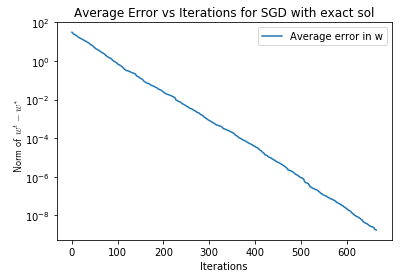

In [42]:
iterations = [i for i in range(len(error))]
#plt.semilogy(iterations, error, label = "Average error in w")
plt.semilogy(iterations, error, label = "Average error in w")
plt.xlabel("Iterations")
plt.ylabel("Norm of $w^t - w^*$",  usetex=True)
plt.title("Average Error vs Iterations for SGD with exact sol")
plt.legend()
plt.show()

In [34]:
print("Required iterations: ", len(error))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses])
print("Final average error: ", average_error)

Required iterations:  666
Final average error:  1.75974518062e-09


# Part B: No solutions, constant step size

In [35]:
y2 = y + np.random.normal(scale=5, size = y.shape)
w=np.linalg.inv(X.T @ X) @ X.T @ y2

In [36]:
its = 5000
w_guesses2, error2 = sgd(X, y2, w, 1e-5, its, 0.0001)
w_guesses3, error3 = sgd(X, y2, w, 1e-5, its, 0.00001)
w_guesses4, error4 = sgd(X, y2, w, 1e-5, its, 0.000001)

In [37]:
w_guess_gd, error_gd = sgd(X, y2, w, 1e-5, its, 0.001, True)

In [38]:
plt.semilogy([i for i in range(len(error2))], error2, label="SGD, lr = 0.0001")
plt.semilogy([i for i in range(len(error3))], error3, label="SGD, lr = 0.00001")
plt.semilogy([i for i in range(len(error4))], error4, label="SGD, lr = 0.000001")
plt.semilogy([i for i in range(len(error_gd))], error_gd, label="GD, lr = 0.00001")
plt.xlabel("Iterations")
plt.ylabel("Norm of $w^t - w^*$",  usetex=True)
plt.title("Total Error vs Iterations for SGD without exact sol")
plt.legend()
plt.show()

RuntimeError: LaTeX was not able to process the following string:
b'Norm of $w^t - w^*$'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.14159265-2.6-1.40.18 (MiKTeX 2.9.6500 64-bit)
entering extended mode
(325d306c44fb925134b082bd4a934ebf.tex
LaTeX2e <2017-04-15>
Babel <3.15> and hyphenation patterns for 75 language(s) loaded.
("E:\Program Files\MiKTeX 2.9\tex\latex\base\article.cls"
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
("E:\Program Files\MiKTeX 2.9\tex\latex\base\size10.clo"))
======================================================================
starting package maintenance...
installation directory: "E:\Program Files\MiKTeX 2.9"
package repository: ftp://mirrors.rit.edu/CTAN/systems/win32/miktex/tm/packages/
visiting repository ftp://mirrors.rit.edu/CTAN/systems/win32/miktex/tm/packages/...
repository type: remote package repository
loading lightweight database...
downloading ftp://mirrors.rit.edu/CTAN/systems/win32/miktex/tm/packages/miktex-zzdb1-2.9.tar.lzma...
175476 bytes, 101.82 KB/Sec
lightweight database digest: 31d3906ad8f7a4eed16e4cc23d5f1327
going to download 332781 bytes
going to install 5 file(s) (1 package(s))
downloading ftp://mirrors.rit.edu/CTAN/systems/win32/miktex/tm/packages/type1cm.tar.lzma...
332781 bytes, 374.83 KB/Sec
extracting files from type1cm.tar.lzma...
======================================================================

("E:\Program Files\MiKTeX 2.9\tex\latex\type1cm\type1cm.sty")
("E:\Program Files\MiKTeX 2.9\tex\latex\base\textcomp.sty"
("E:\Program Files\MiKTeX 2.9\tex\latex\base\ts1enc.def"))
("E:\Program Files\MiKTeX 2.9\tex\latex\geometry\geometry.sty"
("E:\Program Files\MiKTeX 2.9\tex\latex\graphics\keyval.sty")
("E:\Program Files\MiKTeX 2.9\tex\generic\oberdiek\ifpdf.sty")
("E:\Program Files\MiKTeX 2.9\tex\generic\oberdiek\ifvtex.sty")
("E:\Program Files\MiKTeX 2.9\tex\generic\ifxetex\ifxetex.sty")
("E:\Program Files\MiKTeX 2.9\tex\latex\geometry\geometry.cfg")

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 325d306c44fb925134b082bd4a934ebf.aux.
("E:\Program Files\MiKTeX 2.9\tex\latex\base\ts1cmr.fd")
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
[1] (325d306c44fb925134b082bd4a934ebf.aux)

In [39]:
print("Required iterations, lr = 0.0001: ", len(error2))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses2])
print("Final average error: ", average_error)

print("Required iterations, lr = 0.00001: ", len(error3))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses3])
print("Final average error: ", average_error)

print("Required iterations, lr = 0.000001: ", len(error4))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses4])
print("Final average error: ", average_error)

print("Required iterations, GD: ", len(error_gd))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guess_gd])
print("Final average error: ", average_error)

Required iterations, lr = 0.0001:  5000
Final average error:  0.193457197565
Required iterations, lr = 0.00001:  5000
Final average error:  0.0480684459816
Required iterations, lr = 0.000001:  5000
Final average error:  1.59395331748
Required iterations, GD:  31
Final average error:  1.33303021555e-05


# Part C: No solutions, decreasing step size

In [40]:
its = 5000
def step_size(step):
    if step < 500:
        return 1e-4 
    if step < 1500:
        return 1e-5
    if step < 3000:
        return 3e-6
    return 1e-6

w_guesses_variable, error_variable = sgd(X, y2, w, 1e-10, its, step_size, False)

In [41]:
plt.semilogy([i for i in range(len(error_variable))], error_variable, label="Average error, decreasing lr")
plt.semilogy([i for i in range(len(error2))], error2, label="Average error, lr = 0.0001")
plt.semilogy([i for i in range(len(error3))], error3, label="Average error, lr = 0.00001")
plt.semilogy([i for i in range(len(error4))], error4, label="Average error, lr = 0.000001")

plt.xlabel("Iterations")
plt.ylabel("Norm of $w^t - w^*$",  usetex=True)
plt.title("Error vs Iterations for SGD with no exact sol")
plt.legend()
plt.show()

RuntimeError: dvipng was not able to process the following file:
C:\Users\Anchoret\.matplotlib\tex.cache\325d306c44fb925134b082bd4a934ebf.dvi
Here is the full report generated by dvipng: 

This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
[1] 

In [ ]:
print("Required iterations, variable lr: ", len(error_variable))
average_error = np.mean([np.linalg.norm(w-w_guess) for w_guess in w_guesses_variable])
print("Average error with decreasing lr:", average_error)